In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


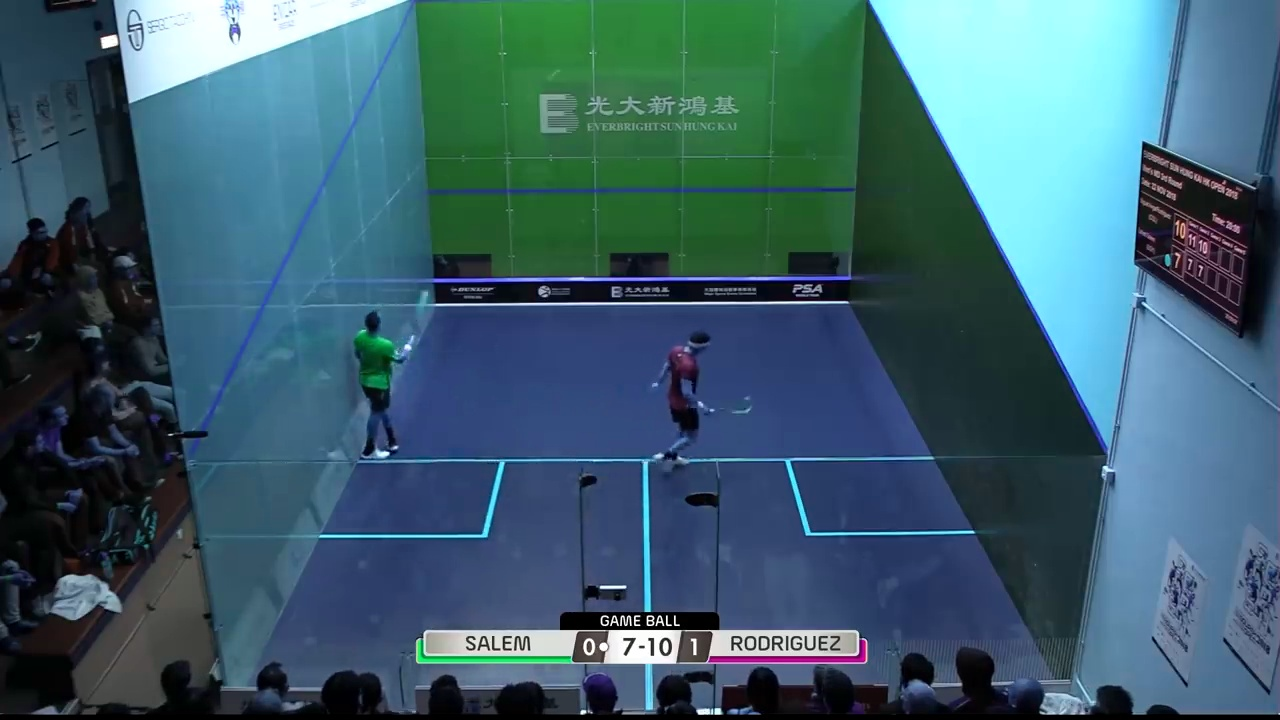

In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/ohtRSiQ-HPg-900179.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

In [ ]:
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

In [ ]:
# GaussianBlur to reduce noise and help edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
edges = cv2.Canny(blurred, 50, 150)
# 50, 150 lower and upper thresholds for edge detection
# canny --> to detect edges

In [ ]:
# Apply a dilation and erosion to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1) # expand light parts in the image
eroded = cv2.erode(dilated, kernel, iterations=1) # minimize the light parts in the image

# Find contours in the eroded image
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Create a blank image to draw the lines
line_image = np.zeros_like(image_rgb)

In [ ]:
# Use Hough Line Transform to detect lines
lines = cv2.HoughLinesP(eroded, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

In [ ]:
# Draw the detected lines on the blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

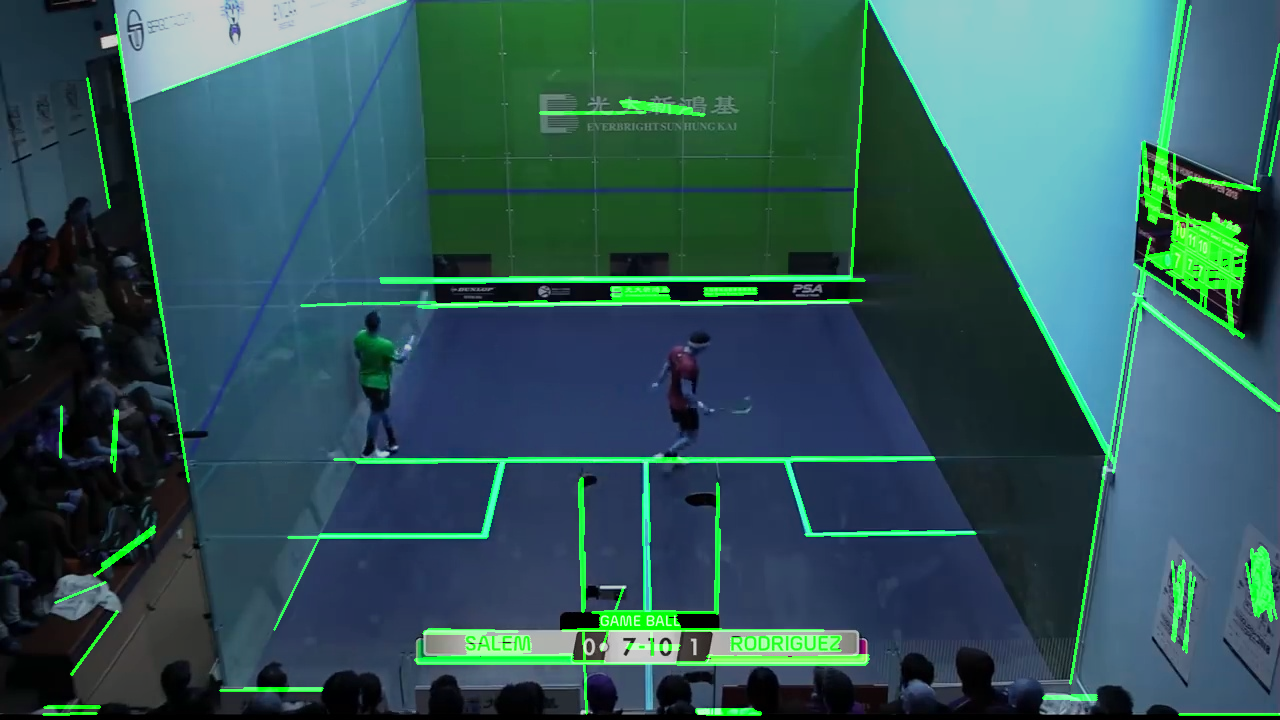

In [ ]:
# Combine the original image with the lines
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
result = cv2.addWeighted(image_rgb, 0.8, line_image, 1, 0)

# Display the result
cv2_imshow(result)